In [44]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

In [45]:
root = zarr.open('trajectories2.zarr', mode='r')


In [46]:
root["collision"]

<zarr.core.Array '/collision' (100734,) float32 read-only>

In [47]:
np.sum(root["collision"][:])

41.0

In [48]:
# Access the model_name dataset
model_names = root['model_name'] # ['model_name']
print(model_names[0])

td_progress


In [49]:
def get_change_indices(model_names):
    change_indices = []
    current_name = model_names[0]
    for idx, name in enumerate(model_names):
        if name != current_name:
            change_indices.append(idx)
            current_name = name
    return change_indices
change_indices = get_change_indices(model_names) + [len(model_names)]

In [50]:
print(change_indices)

[50093, 100734]


In [51]:
def plot_heatmap(start_idx, end_idx):
    # Extract relevant data
    x_data = poses_x[start_idx:end_idx]
    y_data = poses_y[start_idx:end_idx]

    # Create a 2D histogram (heatmap)
    plt.hist2d(x_data, y_data, bins=(100, 100), cmap=plt.cm.jet, range=[[-0.2, 0.1], [-0.05, 0.3]])
    plt.colorbar()
    plt.xlabel('poses_x')
    plt.ylabel('poses_y')
    plt.title(f'Heatmap for model: {model_names[start_idx]}')
    # plt size y from 0 to 0.4
    plt.show()


In [52]:
# print the model of each change idx
print([model_names[i-1] for i in change_indices])

['td_progress', 'min_action']


In [53]:

poses_x = root['observations']['poses_x']
poses_y = root['observations']['poses_y']

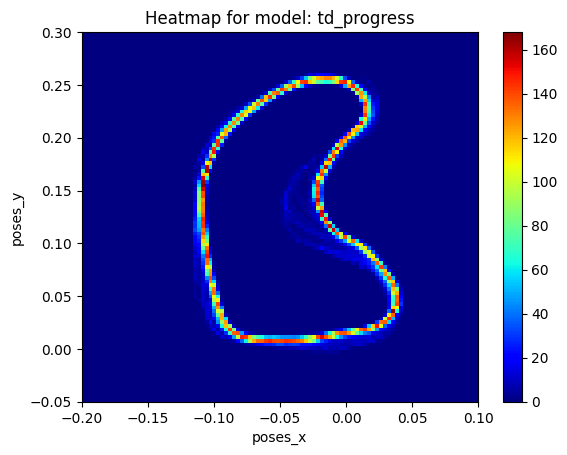

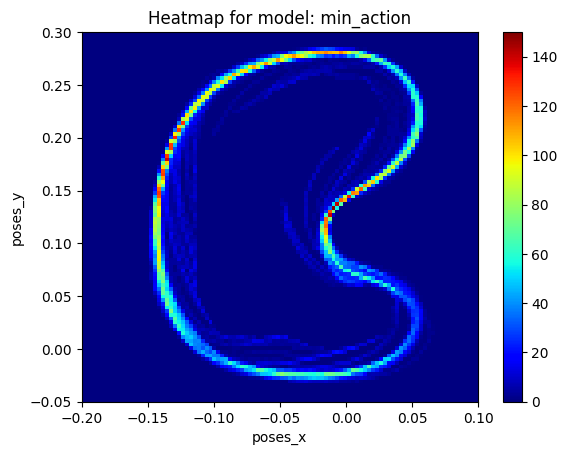

In [54]:

# Now, let's plot for each segment
start_idx = 0
for end_idx in change_indices:
    plot_heatmap(start_idx, end_idx)
    start_idx = end_idx

In [27]:
def plot_comparison_heatmap(start_idx1, end_idx1, start_idx2, end_idx2):
    # Extract relevant data for the first set
    x_data1 = poses_x[start_idx1:end_idx1]
    y_data1 = poses_y[start_idx1:end_idx1]

    # Extract relevant data for the second set
    x_data2 = poses_x[start_idx2:end_idx2]
    y_data2 = poses_y[start_idx2:end_idx2]

    # Define range and bins
    range_val = [[-0.2, 0.1], [-0.05, 0.3]]
    bins_val = (100, 100)
    
    # Create the first heatmap
    plt.hist2d(x_data1, y_data1, bins=bins_val, cmap=plt.cm.Reds, range=range_val, alpha=0.5)
    
    # Create the second heatmap overlayed on top of the first
    plt.hist2d(x_data2, y_data2, bins=bins_val, cmap=plt.cm.Blues, range=range_val, alpha=0.5)
    
    plt.colorbar()
    plt.xlabel('poses_x')
    plt.ylabel('poses_y')
    plt.title(f'Comparison between {model_names[start_idx1]} and {model_names[start_idx2]}')
    #plt.ylim(0, 0.4)
    plt.show()

In [28]:
print([model_names[i-1] for i in change_indices])

['td_progress', 'min_action']


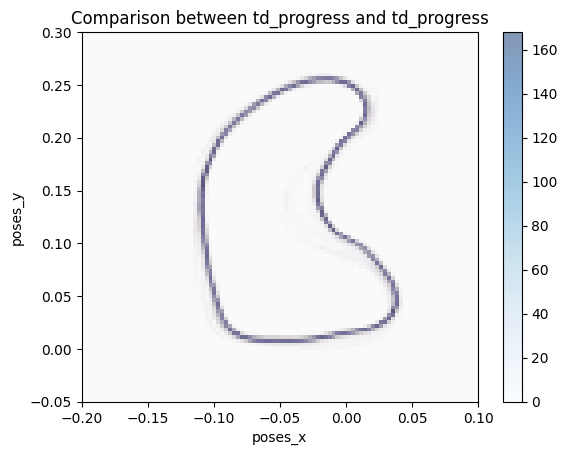

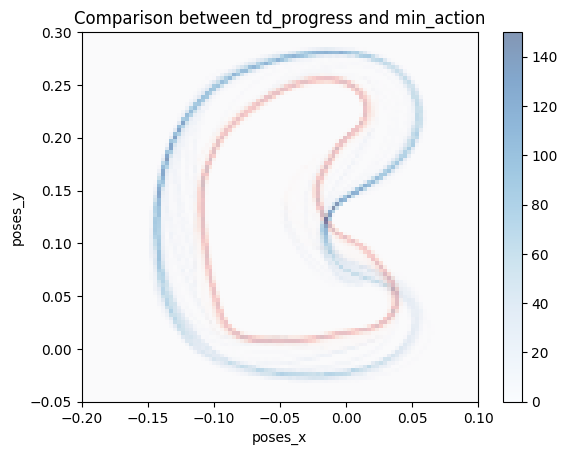

In [30]:
# Call the function
#plot_comparison_heatmap(0, change_indices[1], change_indices[1], change_indices[2])
#plot_comparison_heatmap(0, change_indices[1], change_indices[1], change_indices[2])
# compare each model with velocity
start_idx = 0
for end_idx in change_indices:
    plot_comparison_heatmap(0, change_indices[0], start_idx, end_idx)
    start_idx = end_idx

In [31]:
def plot_average_velocity_heatmap(start_idx, end_idx, poses_x, poses_y, velocities, resolution=0.001):
    # Extract relevant data
    x_data = poses_x[start_idx:end_idx]
    y_data = poses_y[start_idx:end_idx]
    vel_data = velocities[start_idx:end_idx]
    
    # Dictionary to store unique positions and their velocities
    pos_vel_map = {}
    for x, y, v in zip(x_data, y_data, vel_data):
        # Round x and y values based on resolution
        x_bin = round(x / resolution) * resolution
        y_bin = round(y / resolution) * resolution
        
        if (x_bin, y_bin) in pos_vel_map:
            pos_vel_map[(x_bin, y_bin)].append(v)
        else:
            pos_vel_map[(x_bin, y_bin)] = [v]

    # Average velocities for each position
    avg_velocities = [np.mean(v) for v in pos_vel_map.values()]
    
    #alpha
    max_occurrences = max([len(v) for v in pos_vel_map.values()])
    alpha_values = [len(v) / max_occurrences for v in pos_vel_map.values()]


    # Unpack x and y values from the keys
    x_vals, y_vals = zip(*pos_vel_map.keys())
    
    # Create scatter plot with colormap
    plt.scatter(x_vals, y_vals, c=avg_velocities, cmap=plt.cm.jet, vmax=0.1, alpha=alpha_values)
    plt.colorbar()
    plt.xlabel('poses_x')
    plt.ylabel('poses_y')
    plt.xlim(-0.2, 0.1)
    plt.ylim(-0.05, 0.3)
    plt.title(f'Average Velocity Heatmap {model_names[start_idx]}') 
    plt.show()

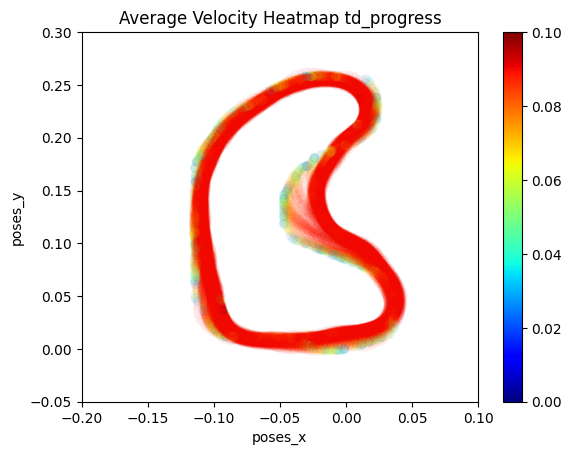

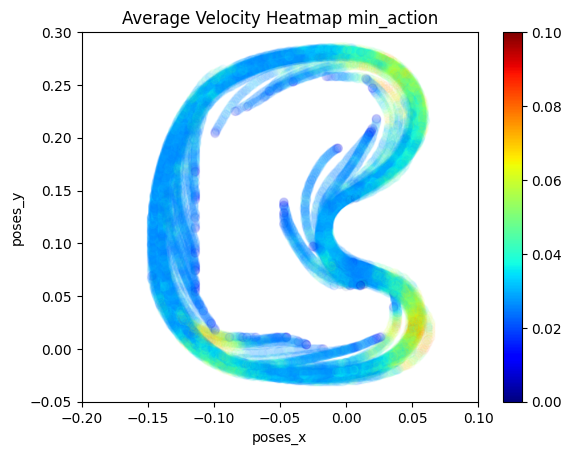

In [32]:



velocities = np.sqrt(np.array(root['observations']['linear_vels_x'])**2 + np.array(root['observations']['linear_vels_y'])**2)
start_idx = 0
for end_idx in change_indices:
    plot_average_velocity_heatmap(start_idx, end_idx, poses_x, poses_y, velocities)
    start_idx = end_idx

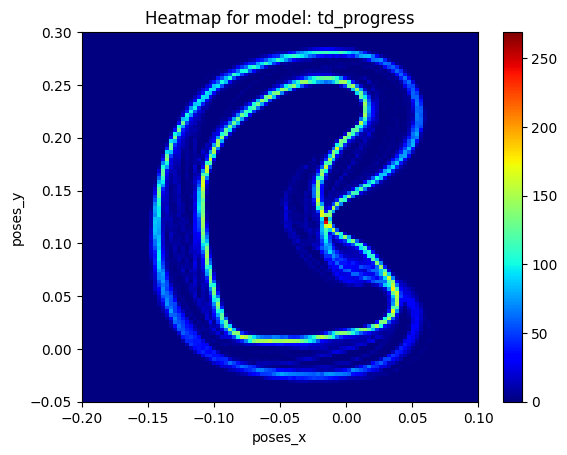

In [33]:
plot_heatmap(0, len(poses_x))

In [34]:
# number of collisions for each model
collisions = root['collision']
print("Number of collisions for each model:")
# loop over models:
start_idx = 0
for idx, change_idx in enumerate(change_indices):
    # count number of collisions for this model
    num_collisions = np.sum(collisions[start_idx:change_idx])
    print(f'{model_names[start_idx]}: {num_collisions}')
    start_idx = change_idx


Number of collisions for each model:
td_progress: 19.0
min_action: 22.0


In [35]:
# for each model give the mean velocity
# print(root['observations'].getkeys())

print("Mean normalized velocity for each model:")
# loop over models:
start_idx = 0
for idx, change_idx in enumerate(change_indices):
    # count number of collisions for this model
    mean_velocity = np.mean(velocities[start_idx:change_idx])
    print(f'{model_names[start_idx]}: {mean_velocity} +- {np.std(velocities[start_idx:change_idx])}')
    start_idx = change_idx

Mean normalized velocity for each model:
td_progress: 0.08822362124919891 +- 0.008022015914320946
min_action: 0.03253384307026863 +- 0.009968200698494911


In [36]:
print(change_indices)

[50093, 100734]


td_progress
min_action


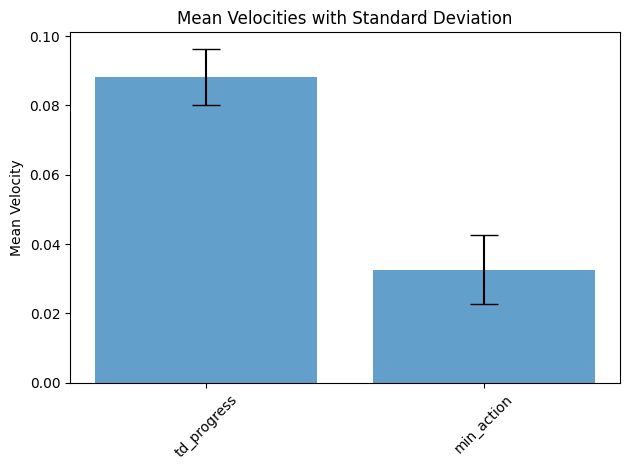

In [37]:

means = []
stds = []

start_idx = 0
model_names_ = []
for idx, change_idx in enumerate(change_indices):
    mean_velocity = np.mean(velocities[start_idx:change_idx])
    std_velocity = np.std(velocities[start_idx:change_idx])
    means.append(mean_velocity)
    stds.append(std_velocity)
    model_names_.append(model_names[start_idx])
    print(model_names[start_idx])
    start_idx = change_idx


# Plotting
plt.bar(model_names_, means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.ylabel('Mean Velocity')
plt.title('Mean Velocities with Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [38]:
# for each model the number of ored dones and truncates
print("Number of ores done and truncates for each model:")
done = root['done']
truncated = root['truncated']
done_or_truncated = np.logical_or(done, truncated)
start_idx = 0
print("Discounted TD Reward")
for idx, change_idx in enumerate(change_indices):
    # count number of collisions for this model
    num_done_or_truncated = np.sum(done_or_truncated[start_idx:change_idx])
    print(f'{model_names[start_idx]}: {num_done_or_truncated}')
    start_idx = change_idx

Number of ores done and truncates for each model:
Discounted TD Reward
td_progress: 218
min_action: 70


In [39]:
def calculate_discounted_reward(rewards, done, truncated, gamma=0.99):
    # combine done and truncated
    done_or_truncated = np.logical_or(done, truncated)
    # split into segments at done or truncated
    change_indices = np.where(done_or_truncated)[0] + 1 # catch the last segment
    # ensure that we dont access out of bounds, by checking if we are at the end
    change_indices[-1] = min(change_indices[-1], len(rewards)-1)
    # calculate discounted reward for each segment
    start_idx = 0
    discounted_rewards = []
    for end_idx in change_indices:
        segment_rewards = rewards[start_idx:end_idx]
        discounted_reward = np.sum(segment_rewards * gamma ** np.arange(len(segment_rewards)))
        # print(f'Discounted reward: {discounted_reward}')
        discounted_rewards.append(discounted_reward)
        start_idx = end_idx
    return np.mean(discounted_rewards), np.std(discounted_rewards)

In [40]:
# for each model calculate the mean discounted reward
start_idx = 0
print("Discounted TD Reward")
for idx, change_idx in enumerate(change_indices): # this is for each model
    # count number of collisions for this model
    mean_discounted_reward, std_discounted = calculate_discounted_reward(root['rewards'][start_idx:change_idx],
                                root['done'][start_idx:change_idx],
                                root['truncated'][start_idx:change_idx])
    print(f'{model_names[start_idx]}: {mean_discounted_reward} +- {std_discounted}')
    start_idx = change_idx
    

Discounted TD Reward
td_progress: 35.616623281646795 +- 5.053186176875786
min_action: 11.251955816281127 +- 2.4197844480754407


In [41]:
# print the numbers of dones 
print("Number of dones:", np.sum(root['done']))
print("Number of truncated:", np.sum(root['truncated']))


Number of dones: 288
Number of truncated: 247


In [42]:
# print distance between truncated being true
truncated = root['truncated']
truncated_indices = np.where(np.array(root['truncated']) == True)[0]

In [43]:
# print diff truncated indices
print("Diff truncated indices:", np.diff(truncated_indices))

Diff truncated indices: [ 238  239  241  236  241  238  239  238  240  239  236  235  235  240
  450  237  239  237  239  242  287  236  241  248  244  239  236  237
  237  234  238  238  236  241  284  238  242  353  239  238  253  238
  245  240  237  329  238  429  234  238  237  239  244  241  245  243
  238  244  236  235  251  241  238  237  281  240  242  234  389  239
  239  241  243  241  241  232  248  236  233  237  238  238  244  238
  241  245  243  458  239  237  231  238  241  236  236  241  238  237
  237  242  241  238  242  239  237  528  239  240  234  246  406  238
  241  239  240  240  237  251  237  490  244  238  239  426  241  244
  239  241  237  239  464  239  238  238  234  239  231  237  246  240
  244  238  244  242  236  237  237  238  238  246  243  239  237  236
  246  236  238  239  246  238  241  237  238  238  235  240  236  239
  246  240  242  240  239  238  235  251  242  424  238  239  240  244
  240  240  232  295  238  237  239  235  236  245  2

In [1]:
import zarr

In [3]:
import numpy as np
import pickle as pkl
import os

In [12]:
with open(os.path.join("datasets", "progress"), 'rb') as f:
    all_timesteps = []
    rewards = []
    while True:
        # action, obs, reward, done, truncated, info, timesteps, model_name 
        try:
            timestep = pkl.load(f)
            all_timesteps.append(timestep)
            rewards.append(timestep[2])
        except EOFError:
            break

In [11]:
print(len(all_timesteps))

97493


In [13]:
numpy_rewards = np.array(rewards)

In [14]:
root = zarr.open('test.zarr', mode='w')

In [15]:
root['rewards'] = numpy_rewards